## Montgomery County House Sale Prediction

### Department of Data Science, University of Maryland Baltimore County  
### DATA 602- Introduction to Machine Learning 

The above captioned dataste is identified form Montgomery county data bank to conduct data analysis suing regression analysis 
algortithm  to predict the price of diffrent houses in the county.

In [646]:
# importing  the necessary tools 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.stats import pearsonr
from pylab import rcParams
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import train_test_split 

### Importing the House Sale Dataset

In [647]:
mydata = pd.read_csv("MHSDATA.csv")

In [648]:
mydata.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_basement,yr_built,zipcode,sqrfttotal_size,price
0,624069108,20160812,4,3.25,7000,28206,1.0,12,3500,1991,20816,38706,1070000.0
1,524069020,20170422,4,4.00,4550,54013,1.0,9,2250,1989,20816,60813,1140000.0
2,148000475,20160528,4,3.25,4700,9160,1.0,11,2180,2005,20854,16040,1810000.0
3,427000065,20170126,5,2.50,4340,9108,1.0,8,2170,1979,20814,15618,1210000.0
4,251500330,20161014,3,2.25,4320,19225,1.0,10,2160,1972,20814,25705,1550000.0


### Data Exploration 
In this section , data  assessment including looking for trends, outliers, exceptions, incorrect, inconsistent, missing, or skewed information will be made.

In [649]:
# The shape  attribute is used to The shape attribute of pandas displays  the number of rows and columns 
# the House sale dataset contains 
mydata.shape

(1500, 13)

In [650]:
# Checking what the columns are:
mydata.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'grade', 'sqft_basement', 'yr_built', 'zipcode',
       'sqrfttotal_size', 'price'],
      dtype='object')

In [651]:
# to check  the dataset  data types # otherwise we may get unexpected results or errors.
mydata.dtypes

id                   int64
date                 int64
bedrooms             int64
bathrooms          float64
sqft_living          int64
sqft_lot             int64
floors             float64
grade                int64
sqft_basement        int64
yr_built             int64
zipcode              int64
sqrfttotal_size      int64
price              float64
dtype: object

In [652]:
# To change the data type "bathroom" from 'object' to float
mydata['bathrooms']=mydata['bathrooms'].astype(float)

In [653]:
# to view the dataset statistical details such as  percentile, mean, std etc. of a data frame
data_expl= mydata.describe()
data_expl

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_basement,yr_built,zipcode,sqrfttotal_size,price
count,1.500000e+03,1.500000e+03,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1.500000e+03
mean,3.538956e+08,2.016365e+07,3.383333,2.168500,2162.615333,23980.676000,1.503667,7.696000,563.413333,1972.116000,20836.679333,26706.704667,1.524477e+06
std,1.971758e+08,4.329986e+03,0.917760,0.844714,983.412471,59627.375131,0.536046,1.275148,491.871434,28.971402,122.416951,59825.821867,6.263739e+05
min,1.000102e+06,2.016050e+07,1.000000,0.000000,530.000000,638.000000,1.000000,5.000000,0.000000,1900.000000,20814.000000,1738.000000,9.990000e+05
25%,2.035501e+08,2.016072e+07,3.000000,1.500000,1445.000000,5441.750000,1.000000,7.000000,0.000000,1953.000000,20814.000000,7931.500000,1.140000e+06
50%,3.220691e+08,2.016101e+07,3.000000,2.250000,1990.000000,8160.000000,1.500000,7.000000,560.000000,1974.500000,20815.000000,11007.500000,1.320000e+06
75%,5.233017e+08,2.017020e+07,4.000000,2.500000,2650.000000,14856.500000,2.000000,8.000000,900.000000,1998.000000,20852.000000,17740.000000,1.680000e+06
max,7.220391e+08,2.017051e+07,10.000000,7.500000,7000.000000,871200.000000,3.000000,12.000000,3500.000000,2017.000000,22181.000000,878685.000000,7.700000e+06


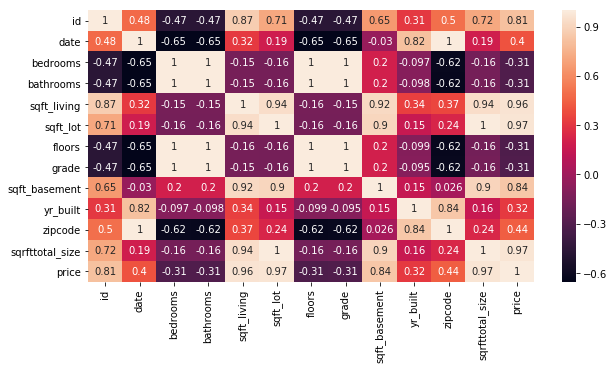

In [654]:
# The hearmap shows the correlation of the features and the target. the darker color shows the correlation.
plt.figure(figsize=(10,5))
sns.heatmap(data_expl.corr(),annot=True)

In [655]:
# to view the dataset statistical details such as  percentile, mean, std etc. of a data frame
data_expl.corr()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_basement,yr_built,zipcode,sqrfttotal_size,price
id,1.000000,0.478008,-0.469220,-0.470042,0.865606,0.713107,-0.472315,-0.469519,0.652671,0.309013,0.499622,0.715246,0.813699
date,0.478008,1.000000,-0.653131,-0.653804,0.318369,0.189012,-0.654149,-0.651443,-0.030256,0.816237,0.997999,0.192562,0.399209
bedrooms,-0.469220,-0.653131,1.000000,0.999999,-0.151325,-0.157524,0.999992,0.999997,0.203353,-0.097068,-0.621828,-0.159720,-0.308582
bathrooms,-0.470042,-0.653804,0.999999,1.000000,-0.152388,-0.158463,0.999996,0.999995,0.202428,-0.097980,-0.622566,-0.160661,-0.309603
sqft_living,0.865606,0.318369,-0.151325,-0.152388,1.000000,0.940048,-0.155242,-0.151869,0.916654,0.337178,0.365022,0.941038,0.962604
sqft_lot,0.713107,0.189012,-0.157524,-0.158463,0.940048,1.000000,-0.161223,-0.158589,0.903436,0.153640,0.235181,0.999992,0.972918
floors,-0.472315,-0.654149,0.999992,0.999996,-0.155242,-0.161223,1.000000,0.999990,0.199640,-0.098543,-0.623057,-0.163421,-0.312281
grade,-0.469519,-0.651443,0.999997,0.999995,-0.151869,-0.158589,0.999990,1.000000,0.202407,-0.094886,-0.620152,-0.160776,-0.309220
sqft_basement,0.652671,-0.030256,0.203353,0.202428,0.916654,0.903436,0.199640,0.202407,1.000000,0.147215,0.025631,0.903026,0.844460
yr_built,0.309013,0.816237,-0.097068,-0.097980,0.337178,0.153640,-0.098543,-0.094886,0.147215,1.000000,0.838678,0.156680,0.315419


In [656]:
# As we can see the count shows , the datasets are eqaul in size. 
# The average price for the houses is 540182 
# The max  price cells in the county = 7,700000
# Most houses were sold in 2016 etc.

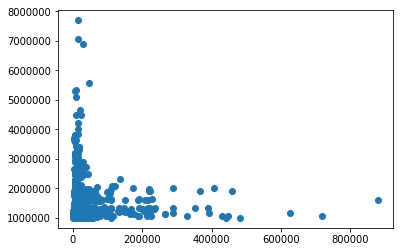

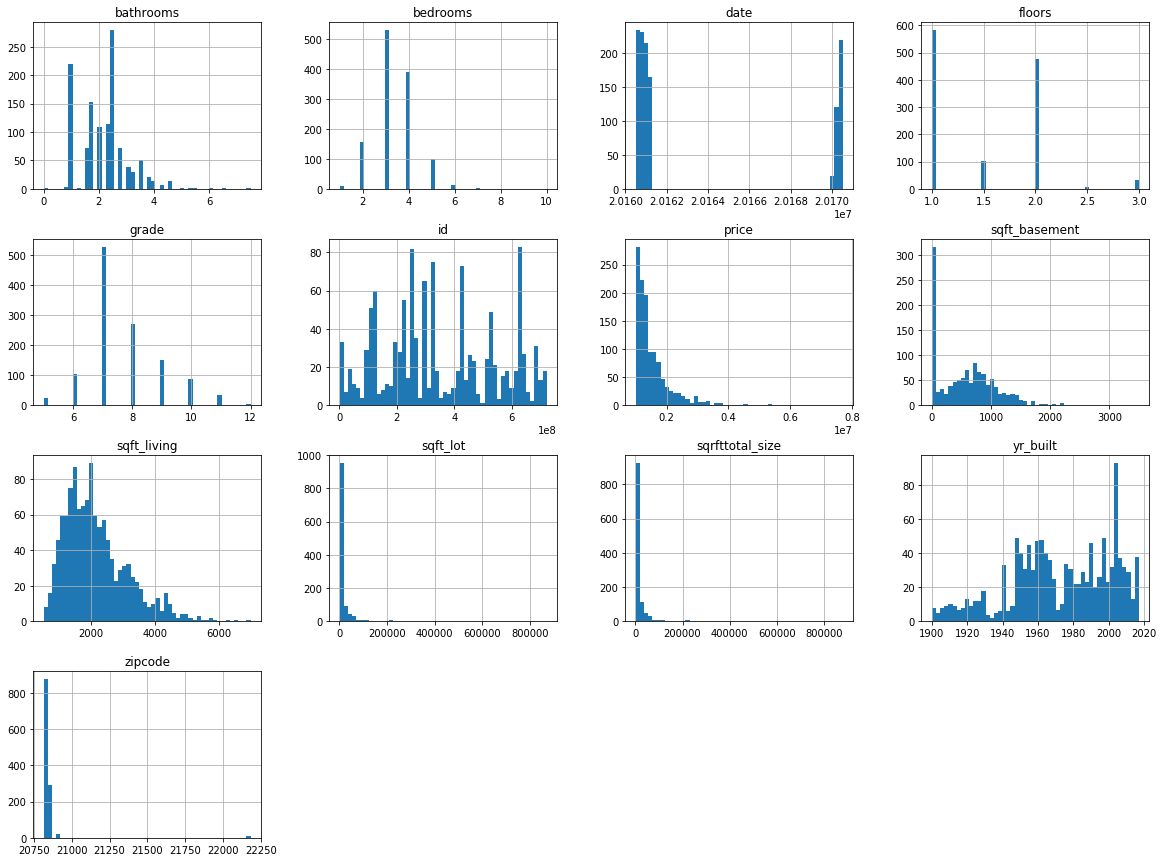

In [657]:
# The graph below show the relationship between the house size and price
plt.scatter(mydata['sqrfttotal_size'] , mydata['price'])
tr.hist(bins=50, figsize=(20,15))
plt.show()

## Data Correlation   



<h3>Def.  correlation is a stastic that evaluate how closely two variables move  together or in oppostite directions or even if they are related at all. 
 So it reanges in value from   negative 1  which means perfectly negatively correlated in that when one decrease the other also decreases 
or 1 perfectly positively correlated. if one increase the other also increase. if the correlation is  zero ,then the relationship will be weak or nor relationship at all.</h3>


In [658]:
data_expl.corr()['price'].sort_values (ascending =False)

price              1.000000
sqrfttotal_size    0.973793
sqft_lot           0.972918
sqft_living        0.962604
sqft_basement      0.844460
id                 0.813699
zipcode            0.440844
date               0.399209
yr_built           0.315419
bedrooms          -0.308582
grade             -0.309220
bathrooms         -0.309603
floors            -0.312281
Name: price, dtype: float64

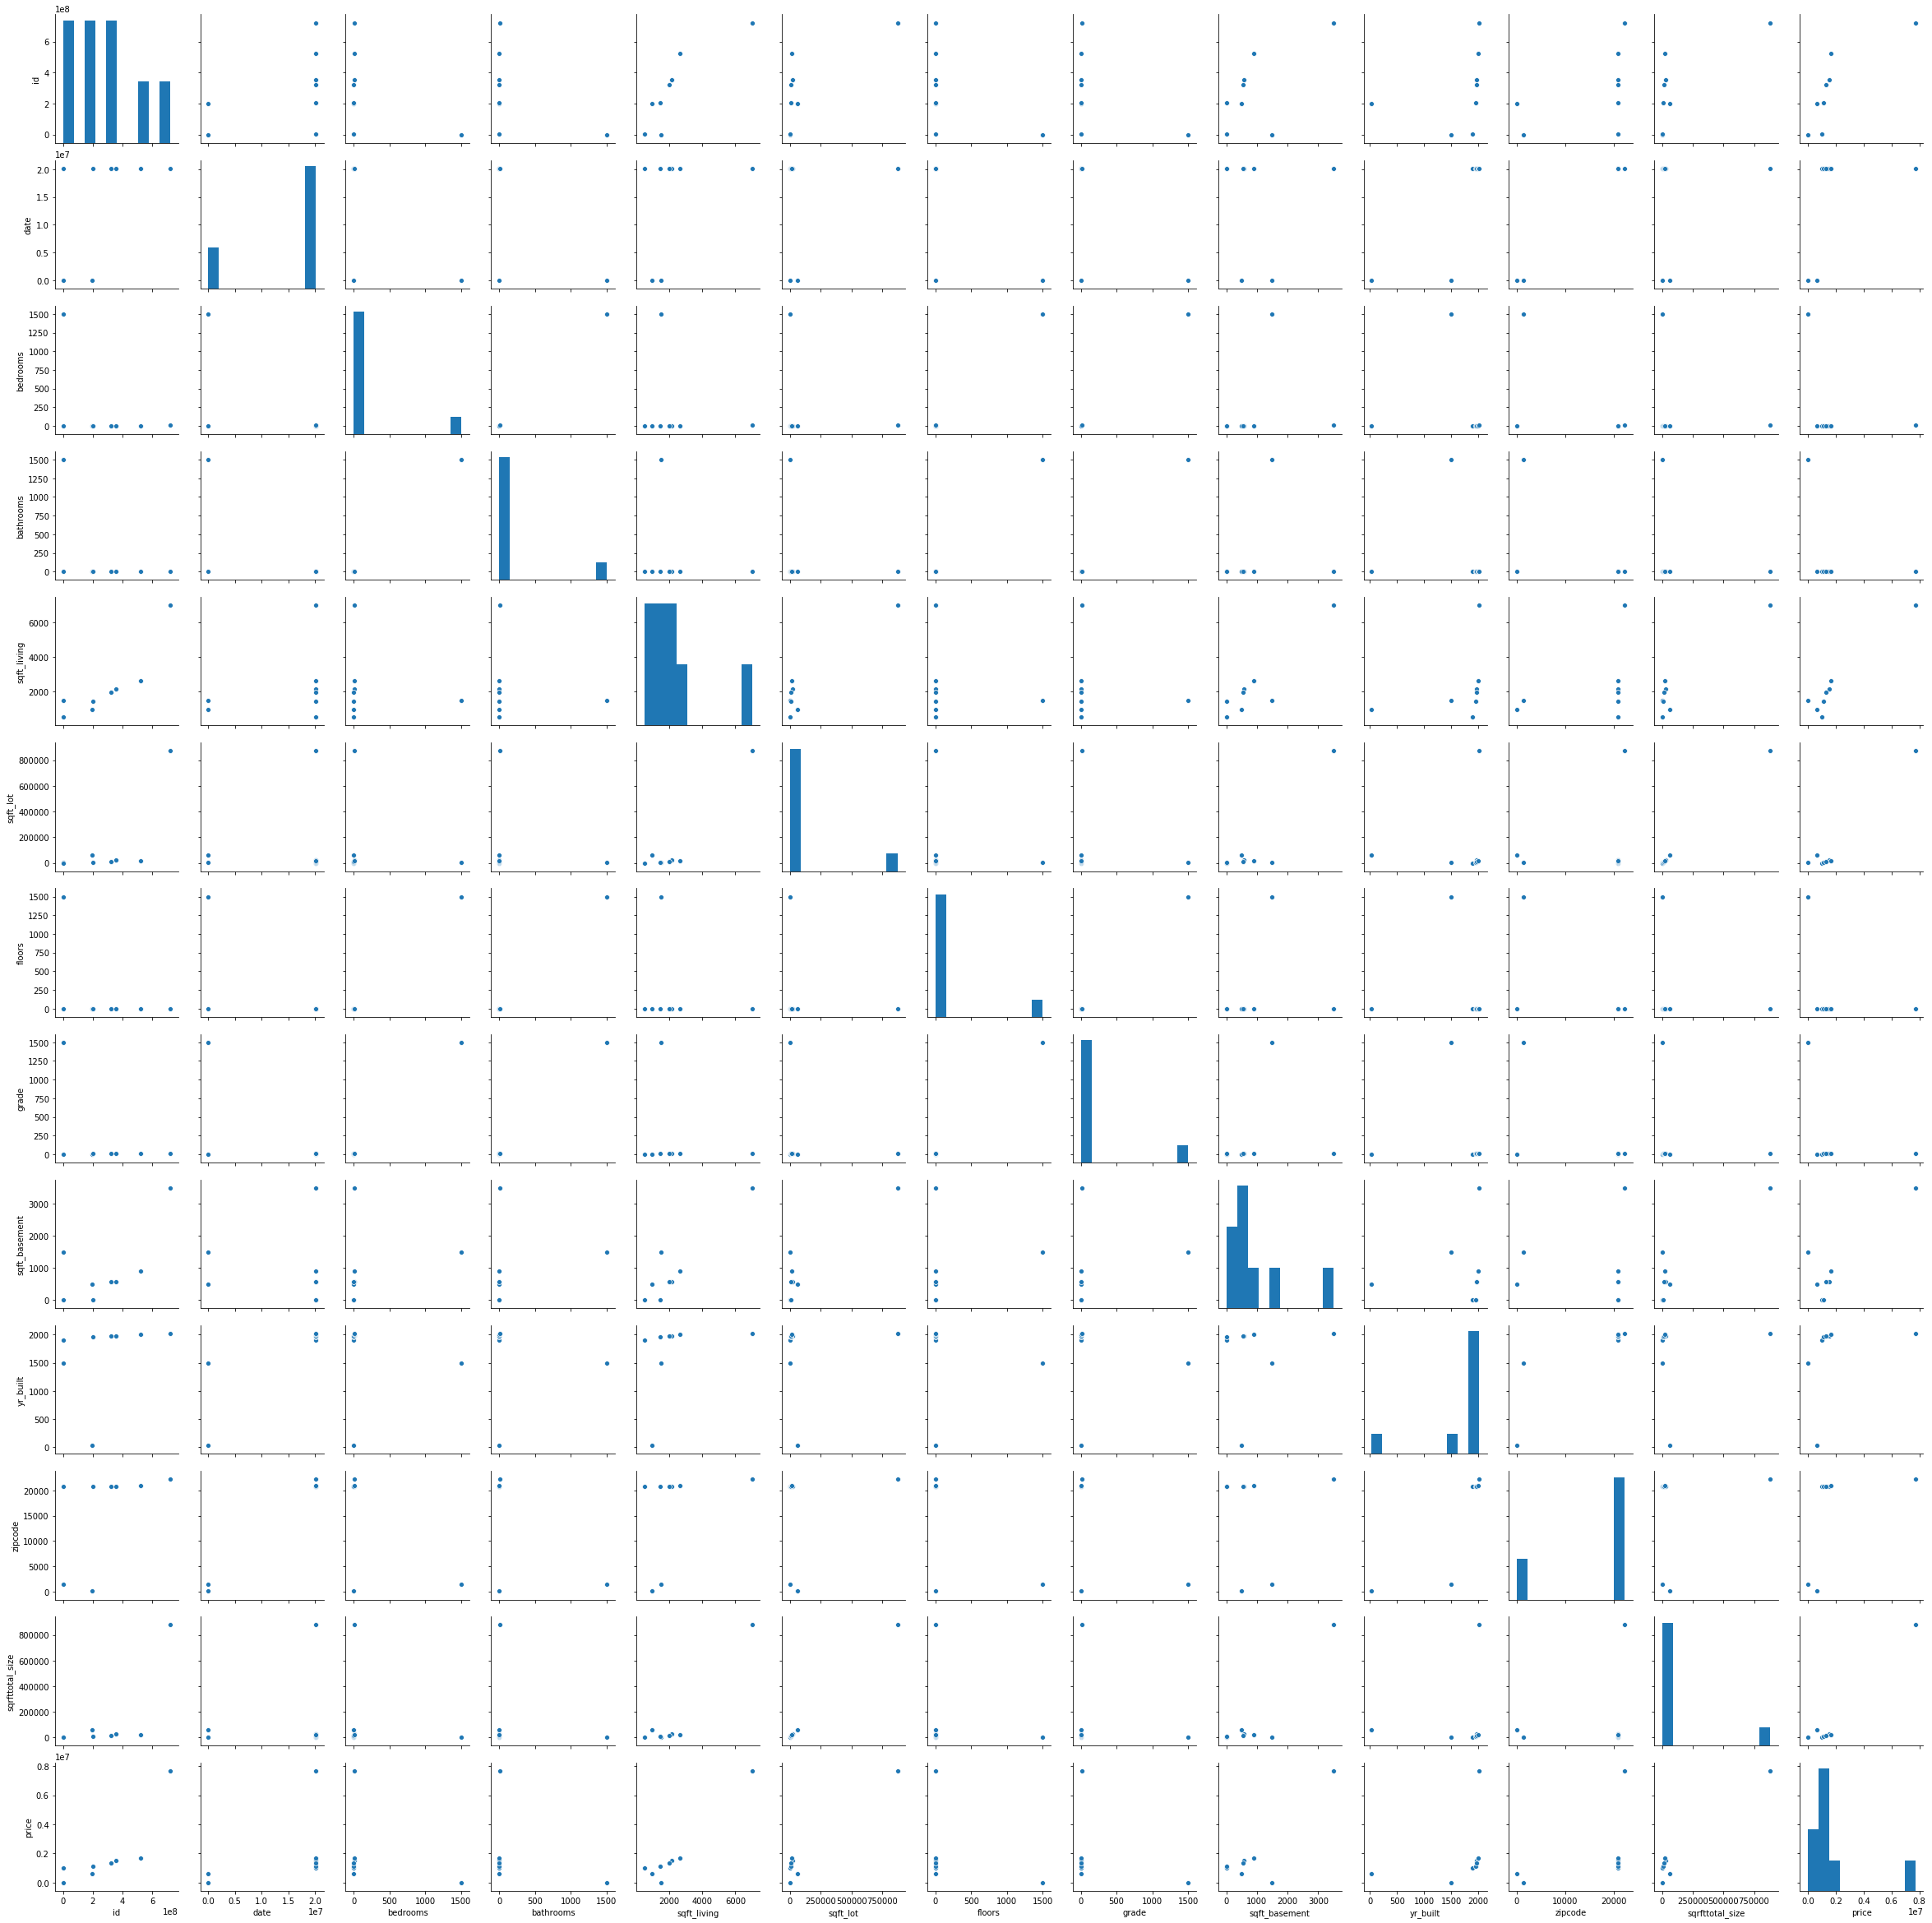

In [659]:
# Visulizing the dataset. 
#from pandas.plotting import scatter_matrix
#scatter_matrix(data_expl, figsize=(16,12) ,alpha=0.3) 
sns.pairplot(data_expl) 

In [660]:
#  the graph  above show positive  correlation between price and total size of the house. 

In [661]:
# The avarage price cells in the county
mydata.price.mean()

1524476.5993333333

In [662]:
# The max  price cells in the county
mydata.price.max()

7700000.0

In [663]:
# to observe the location of houses with max sales prices.
exp_location= mydata.groupby('zipcode').price.max()
exp_location.head()

zipcode
20814    1580000.0
20815    3850000.0
20816    1150000.0
20852    1050000.0
20854    1930000.0
Name: price, dtype: float64

C:\Users\MYHIW\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


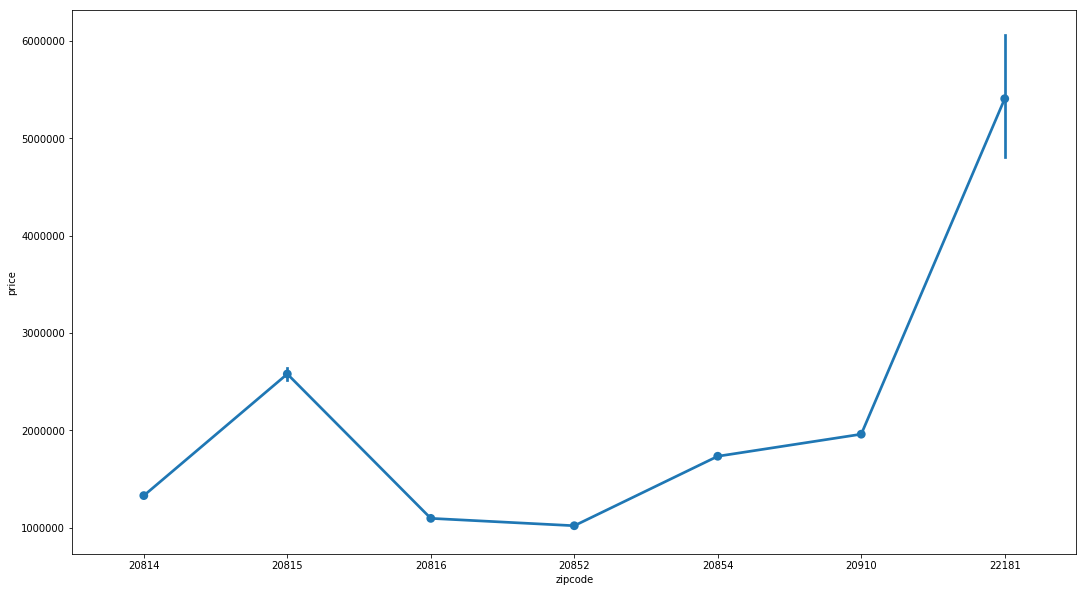

In [664]:
# to observe the location of houses with max sales prices.
fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x="zipcode", y="price" , ax=ax, data= mydata)

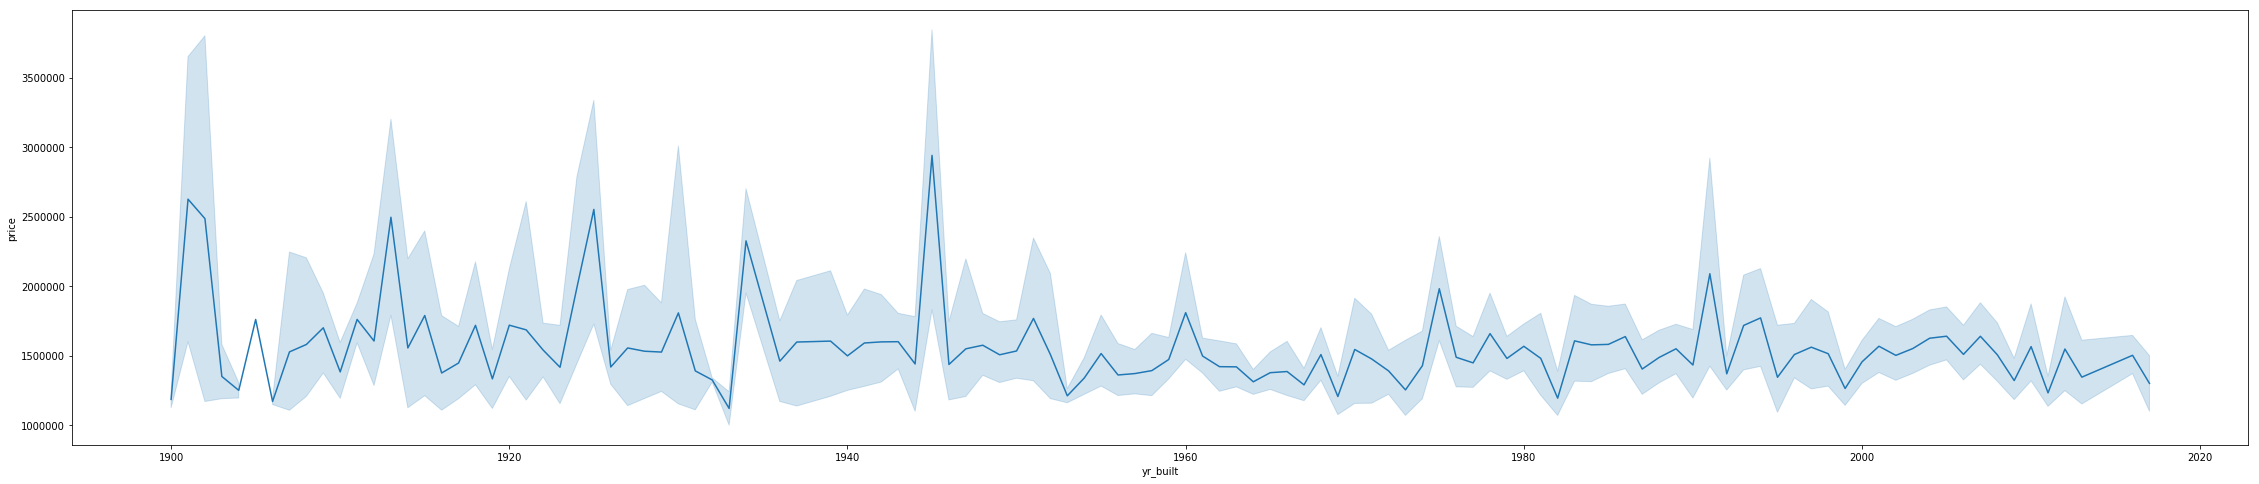

In [665]:
# Age do not determine the max price
mydata.groupby('yr_built').price.max()
fig_dims = (39, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x="yr_built", y="price" , ax=ax, data= mydata)

### Data Preparation
 in this section the ncesessary formatting will be made for  data to make it consistent

In [666]:
# To change the data type "bathroom" from 'object' to float
mydata['bathrooms']=mydata['bathrooms'].astype(float)

In [667]:
# Check if the data is empty.
mydata.isna().sum()

id                 0
date               0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
grade              0
sqft_basement      0
yr_built           0
zipcode            0
sqrfttotal_size    0
price              0
dtype: int64

### Improving the data quality

<h3>Here, start by having a strategy for dealing with erroneous data, missing values, extreme values, and outliers in your data. .</h3>

In [668]:
mydata.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_basement,yr_built,zipcode,sqrfttotal_size,price
0,624069108,20160812,4,3.25,7000,28206,1.0,12,3500,1991,20816,38706,1070000.0
1,524069020,20170422,4,4.00,4550,54013,1.0,9,2250,1989,20816,60813,1140000.0
2,148000475,20160528,4,3.25,4700,9160,1.0,11,2180,2005,20854,16040,1810000.0
3,427000065,20170126,5,2.50,4340,9108,1.0,8,2170,1979,20814,15618,1210000.0
4,251500330,20161014,3,2.25,4320,19225,1.0,10,2160,1972,20814,25705,1550000.0


In [669]:
mydata.shape

(1500, 13)

In [670]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
id                 1500 non-null int64
date               1500 non-null int64
bedrooms           1500 non-null int64
bathrooms          1500 non-null float64
sqft_living        1500 non-null int64
sqft_lot           1500 non-null int64
floors             1500 non-null float64
grade              1500 non-null int64
sqft_basement      1500 non-null int64
yr_built           1500 non-null int64
zipcode            1500 non-null int64
sqrfttotal_size    1500 non-null int64
price              1500 non-null float64
dtypes: float64(3), int64(10)
memory usage: 152.4 KB


###  Splitting data into training and evaluation sets

The final step is to split your data into two sets; one for training your algorithm, and another for evaluation purposes

In [671]:
shuffled_data = mydata.sample(frac=1., random_state=42)
shuffled_data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_basement,yr_built,zipcode,sqrfttotal_size,price
1116,349400100,20160908,3,1.75,1480,7830,1.0,7,0,1980,20814,9310,1280000.0
1368,624100010,20161208,3,2.50,2930,19900,1.5,9,0,1983,20816,22830,1070000.0
422,476000017,20161003,2,2.00,1400,1512,2.0,8,460,2006,20814,3372,1180000.0
413,7600065,20160605,3,2.25,1530,1245,2.0,9,480,2016,20815,3255,3710000.0
451,567000755,20161205,2,3.00,1790,1709,2.0,7,390,2001,20816,3889,1100000.0


In [672]:
# initilizing train test split method

In [673]:
split_point = int(shuffled_data.shape[0]* 0.80)
split_point

1200

In [674]:
# assigning traiining and test dataset
tr=shuffled_data.iloc[:split_point]
ts=shuffled_data.iloc[split_point:]

In [675]:
len(tr) + len(ts)== len(shuffled_data)

True

### Data Visualizations
visualization is used to explore and communicate the  findings and is the next phase of the  data analytics phase

In [676]:
#length of Training Set
len(tr)

1200

In [677]:
#length of Training Set
len(ts)

300

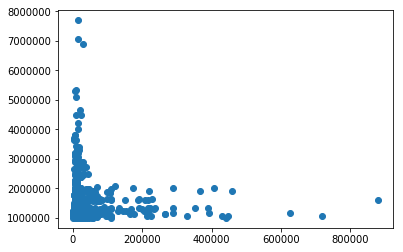

In [678]:
plt.scatter(tr['sqrfttotal_size'] , tr['price'])

In [679]:
tr.shape

(1200, 13)

### Getting insights of  future trends

 Here, regression analysis algorithms will be used to  build models to uncover trends in the house sale model.

In [680]:
# The statistical data shows outliers. 
tr.describe()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_basement,yr_built,zipcode,sqrfttotal_size,price
count,1.200000e+03,1.200000e+03,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1.200000e+03
mean,3.509462e+08,2.016367e+07,3.400833,2.173125,2172.495000,24320.528333,1.50125,7.707500,569.266667,1972.350000,20838.258333,27062.290000,1.531580e+06
std,1.966958e+08,4.342222e+03,0.934109,0.853155,993.375255,61969.909552,0.53388,1.269496,485.954350,28.911198,130.741594,62153.620027,6.388062e+05
min,1.000102e+06,2.016050e+07,1.000000,0.000000,530.000000,638.000000,1.00000,5.000000,0.000000,1900.000000,20814.000000,1738.000000,9.990000e+05
25%,2.033254e+08,2.016072e+07,3.000000,1.750000,1443.750000,5458.250000,1.00000,7.000000,0.000000,1953.000000,20814.000000,7958.750000,1.150000e+06
50%,3.215797e+08,2.016101e+07,3.000000,2.250000,1990.000000,8250.000000,1.50000,7.000000,570.000000,1974.000000,20815.000000,11261.000000,1.330000e+06
75%,5.220691e+08,2.017021e+07,4.000000,2.500000,2671.250000,15005.000000,2.00000,8.000000,900.000000,1998.000000,20852.000000,17893.750000,1.680000e+06
max,7.220391e+08,2.017051e+07,10.000000,7.500000,7000.000000,871200.000000,3.00000,12.000000,3500.000000,2017.000000,22181.000000,878685.000000,7.700000e+06


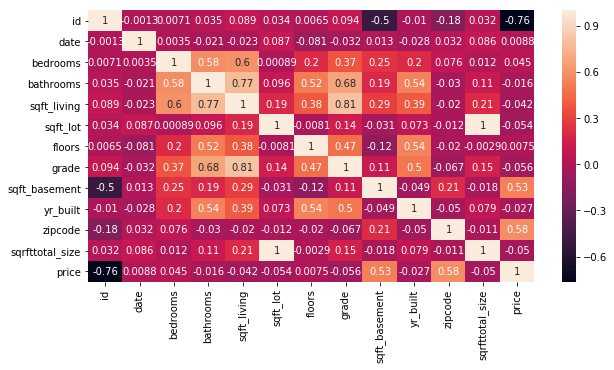

In [681]:
plt.figure(figsize=(10,5))
sns.heatmap(tr.corr(),annot=True)

In [682]:
# CHEKING THE TREND OF THE PRICES AND sizes

In [683]:
tr.price.mean()


1531579.9575

In [684]:
tr.price.max()

7700000.0

In [685]:
tr.price.min()

999000.0

In [686]:

tr.sqrfttotal_size.max()

878685

In [687]:
tr.sqrfttotal_size.min()

1738

In [688]:
tr.sqrfttotal_size.mean()

27062.29

## Building a Model

<h3> In this section , linear regression, ridge regression, and lasso regression will be compared and see how well each model makes a prediction.</h3> 


In [689]:
### Regression Modle: 


In [690]:
tr.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'grade', 'sqft_basement', 'yr_built', 'zipcode',
       'sqrfttotal_size', 'price'],
      dtype='object')

In [691]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [692]:

X= tr[['sqrfttotal_size']]
y= tr['price']
      

In [693]:
reg=LinearRegression()
reg.fit (X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [694]:
reg.intercept_


1545503.0864523943

In [695]:
reg=LinearRegression()
reg.fit(tr[["sqrfttotal_size"]],tr.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [696]:
reg.score(tr[["sqrfttotal_size"]],tr.price)

0.002505758812497927

In [697]:
reg.coef_

array([-0.51448451])

In [698]:
reg.score(ts[["sqrfttotal_size"]],ts.price)

-0.0011218020170329357

In [699]:
tr=pd.get_dummies(tr,drop_first=True)
tr.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_basement,yr_built,zipcode,sqrfttotal_size,price
1116,349400100,20160908,3,1.75,1480,7830,1.0,7,0,1980,20814,9310,1280000.0
1368,624100010,20161208,3,2.50,2930,19900,1.5,9,0,1983,20816,22830,1070000.0
422,476000017,20161003,2,2.00,1400,1512,2.0,8,460,2006,20814,3372,1180000.0
413,7600065,20160605,3,2.25,1530,1245,2.0,9,480,2016,20815,3255,3710000.0
451,567000755,20161205,2,3.00,1790,1709,2.0,7,390,2001,20816,3889,1100000.0


In [700]:
X=tr.drop('price', axis=1)
y=tr['price']

In [701]:
X_test.shape

(240, 12)

In [702]:
y_test.shape

(240,)

## Lasso Regression 

<h3> Lasso regression is used for  shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean.</h3>

In [703]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)
lasso_reg.fit(X,y)

Lasso(alpha=50, copy_X=True, fit_intercept=True, max_iter=100,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.1, warm_start=False)

In [704]:
lasso_reg.score(X_train, y_train)

0.8139867399955776

## Conclusion 
<h3> </h3>Based on the analysis conducted to predict the price of house sale in Montgomery County for classification problem, the best-performing model was   Lasso  which shrink the data and reduced the outlier to perform 0.81 accuracy rate the best-performing model to resolve the  regression problem.